<a href="https://colab.research.google.com/github/julissamijares/SI-boston-city-budget/blob/main/SI-analysis/Neighborhood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *

In [ ]:
#load the data
df = pd.read_csv("/content/drive/My Drive/WORK/SI_Budget_Report/Datasets/clean_CapBudget.csv")

df.head()

,Department,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Total_Project_Budget
0,Boston Centers for Youth and Families,Boston Centers for Youth and Families,To Be Scheduled,Citywide,750000.0,1250000.0,NaN,NaN,100000.0,1900000.0,2000000
1,Boston Centers for Youth and Families,Public Facilities Department,In Design,Mission Hill,1800000.0,NaN,NaN,100000.0,1500000.0,200000.0,1800000
2,Boston Centers for Youth and Families,Public Facilities Department,In Design,North End,5000000.0,63000000.0,NaN,400000.0,3000000.0,64600000.0,88000000
3,Boston Centers for Youth and Families,Boston Centers for Youth and Families,Annual Program,Citywide,1300000.0,1000000.0,383450.0,450000.0,700000.0,766550.0,2300000
4,Boston Centers for Youth and Families,Youth Engagement and Employment,Implementation Underway,Citywide,1000000.0,NaN,17140.0,25000.0,250000.0,707860.0,1000000


In [ ]:
# Exclude "Citywide" and "Multiple Neighborhoods" rows
filtered_df = df[~df['Neighborhood'].isin(['Citywide', 'Multiple Neighborhoods'])]

# Group by Neighborhood and calculate sum of Total_Project_Budget
grouped_df = filtered_df.groupby('Neighborhood')['Total_Project_Budget'].sum().reset_index()

# Calculate the total sum of Total_Project_Budget
total_budget = grouped_df['Total_Project_Budget'].sum()

# Calculate the percentage of the total budget for each neighborhood
grouped_df['Percentage'] = (grouped_df['Total_Project_Budget'] / total_budget) * 100

# Sort the DataFrame by Total_Project_Budget in descending order
sorted_df = grouped_df.sort_values(by='Total_Project_Budget', ascending=False)

# Print the result
print(sorted_df)

                  Neighborhood  Total_Project_Budget  Percentage
4                  Charlestown             531212390   18.848537
7   Downtown/Government Center             318415000   11.298036
5                    Chinatown             271272172    9.625309
6                   Dorchester             239411239    8.494816
17                     Roxbury             237308325    8.420200
18                South Boston             200249965    7.105291
19                   South End             181432034    6.437591
10              Harbor Islands             171778144    6.095051
16                  Roslindale             102470000    3.635852
15                   North End              95445000    3.386590
13                    Mattapan              87935000    3.120119
12               Jamaica Plain              81700000    2.898888
1                     Back Bay              65442299    2.322031
8                  East Boston              62457890    2.216138
0             Allston/Bri

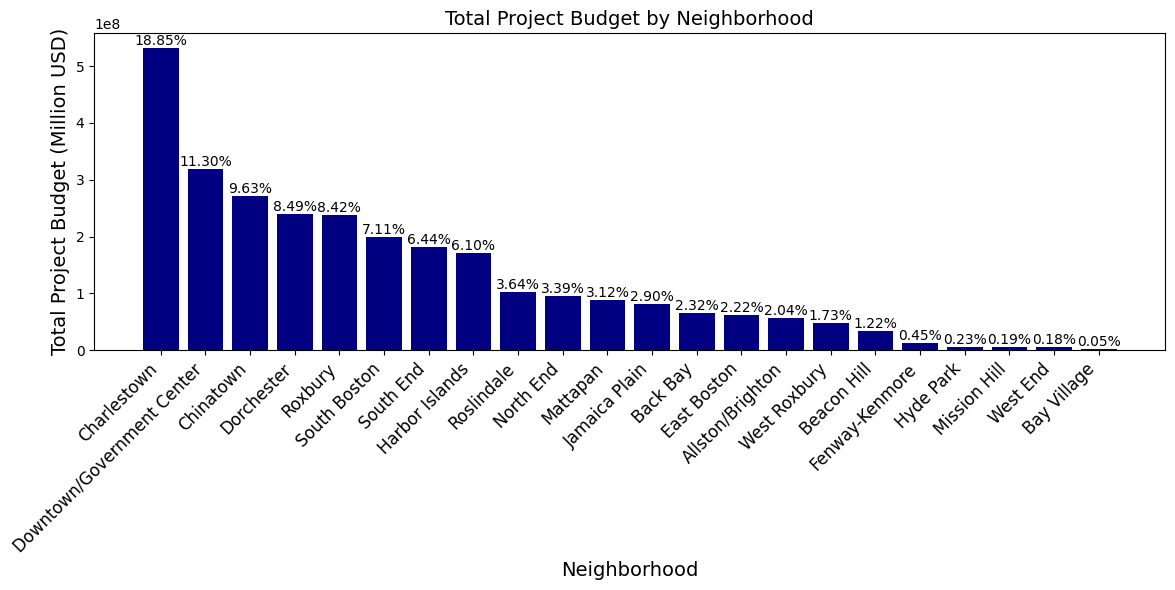

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Bar plot
plt.bar(sorted_df['Neighborhood'], sorted_df['Total_Project_Budget'], color='navy')

# Adding percentage labels on top of the bars
for i, value in enumerate(sorted_df['Percentage']):
    plt.text(i, sorted_df['Total_Project_Budget'].iloc[i] + 5, f'{value:.2f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Total Project Budget (Million USD)', fontsize=14)
plt.title('Total Project Budget by Neighborhood', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()